<a href="https://colab.research.google.com/github/sonnnaya/K-meansAlgorithm/blob/main/K-meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering by K-means algorithm
## Difference between clustering and classification
In the previous topics ([Classification by minimum distance](https://github.com/sonnnaya/MinimumDistanceClassification/blob/master/MinimumDistanceClassification.ipynb) and 
[Classification by using decisive functions and diving hypersurfaces](https://github.com/sonnnaya/DecisiveAndDividingFunctions/blob/main/DecisiveAndDividingFunctions.ipynb)) we considered classification methods. It means we used a set of images with an predefined classes - we knew their amount  and the standards they are described with.

On the other hand, the clustering task is to identify similarities between images and to unite such images into groups called clusters. So, in other words the main difference is the fact:

> Classification $\rightarrow$ supervised learning

> Clustering $\rightarrow$ unsupervised learning


## Clustering introduction
In the formal definition of a cluster on the set of source data, the following concepts are used:

*   Measure of similarity

This is a measure describing how similar images are.

*   Clustering criterion

The mathematical approach uses procedures to minimize (or maximize) the selected quality criterion, which ensure the correctness of clustering.

*   Clustering algorithm

A set of procedures that operate with the selected measure of similarity and are determined by the appropriate approach to solving the problem of clustering






# K-means algorithm
## Parameters
Input data - a set of n-dimensional images:
$$
X=\{\overline{x}_{1}, \overline{x}_{2},...,\overline{x}_{N}\},
$$
where $\overline{x}_{i}=[x_{1},x_{2},...,x_{n}]^{T}$

Randomly selected cluster centers (let's take the first $k$ images from a given set $X$):
$$
\overline{z}^{(1)}_{1},\overline{z}^{(1)}_{2},...,\overline{z}^{(1)}_{k}
$$

---


Notice index $^{(1)}$ indicates the iteration number.

---

## Measure of similarity
As a measure of similarity we take the Euclidean distance:
$$
D_{i}=|\overline{x}-\overline{z}_{i}|=\sqrt{\sum_{j=1}^{n} (x_{j}-z_{ij})^{2}}
$$

## Clustering (quality) criterion
We are going to use the sum of the sum of squared distances from each cluster's images to its center as a quality criterion:
$$
I=\sum_{j=1}^{K}\sum_{\overline{x}\ \in\ S_{j}}|\overline{x}-\overline{m}_{j}|^{2},
$$
where:

$K -$ number of clusters,

$S_{j}-j$-cluster images,

$\overline{m}_{j}=\frac{1}{N_{j}}\sum_{\overline{x}\ \in\ S_{j}}\overline{x}\ -$  sample mean vector for $j$-cluster images,

$N_{j}-$ number of $j$-cluster images.

So, by minimizing this criterion we will get more correct clusters.



In [3]:
from typing import List
import numpy as np


def get_euclid(image1: np.ndarray, image2: np.ndarray) -> float:
    return np.linalg.norm(np.array(image1) - np.array(image2))


class Cluster:
    def __init__(self, standard: np.ndarray):
        self.standard: np.ndarray = np.array(standard)
        self.images: List[np.ndarray] = []

    def get_distance(self, image: np.ndarray) -> float:
        return get_euclid(image, self.standard)

    def get_mean(self) -> np.ndarray:
        return np.mean(np.array(self.images), axis=0)

    def get_deviation(self) -> float:
        return sum(map(lambda x: get_euclid(x, self.standard) ** 2, self.images))

    def add(self, image: np.ndarray) -> None:
        self.images.append(np.array(image))


## Algorithm


1. By the [method of the minimum distance](https://github.com/sonnnaya/MinimumDistanceClassification/blob/master/MinimumDistanceClassification.ipynb) the images are distributed in clusters:

Image $\overline{x}\in S_{i}$ if $|\overline{x}-\overline{z}_{i}|=min(|\overline{x}-\overline{z}_{1}|, |\overline{x}-\overline{z}_{2}|, ..., |\overline{x}-\overline{z}_{K}|)$ 
2. To minimize quality criterion of each cluster 

$$
I^{(1)}(\overline{z}^{(1)}_{j})=\sum_{\overline{x}\ \in\ S_{j}}|\overline{x}-\overline{z}^{(1)}_{j}|^{2}
$$ 
we need to find new centers of each clusters as their sample means:
  $$
\overline{z}^{(2)}_{j}=\frac{1}{N_{j}}\sum_{\overline{x}\ \in\ S_{j}}\overline{x},\ j=\overline{1,k}
  $$
3. We check the condition whether the new centers of the clusters are equal to the previous ones:
$$
\overline{z}^{(2)}_{j}-\overline{z}^{(1)}_{j}=0,\ j=\overline{1,k}
$$ 
*   If the equation above is $True \rightarrow$ the clustering process is over.

*   Else (equation is $False$) $\rightarrow$ begin a new iteration from point #1 using found centers $\overline{z}^{(2)}_{j}$.

In [8]:
def define_image(clusters: List[Cluster], image: np.ndarray) -> None:
    distances = [cluster.get_distance(image) for cluster in clusters]
    minimum = min(distances)
    index = distances.index(minimum)
    clusters[index].add(image)


def get_clustered(images: List[np.ndarray], standards: List[np.ndarray]) -> List[Cluster]:
    clusters = [Cluster(standard) for standard in standards]

    for image in images:
        define_image(clusters, image)

    return clusters


def is_equals(previous: List[np.ndarray], current: List[np.ndarray]) -> bool:
    return np.allclose(np.array(previous), np.array(current))


def k_mean(images: List[np.ndarray], standards: List[np.ndarray]) -> List[Cluster]:
    clusters = get_clustered(images, standards)
    standards = [cluster.standard for cluster in clusters]

    while True:
        means = [cluster.get_mean() for cluster in clusters]

        if is_equals(standards, means):
            break

        standards = means
        clusters = get_clustered(images, standards)

    return clusters

# Testing

In [5]:
from google.colab import files 

  
uploaded = files.upload()

Saving data_test.csv to data_test.csv


In [6]:
from numpy import genfromtxt


images_ = genfromtxt('data_test.csv', delimiter=',')
standards_ = images_[0:3]

In [11]:
clusters_ = k_mean(images_, standards_)

print(f'K-means result:')
for i, cluster in enumerate(clusters_):
    print(f'Cluster {i + 1}: {[image.tolist() for image in cluster.images]}')

K-means result:
Cluster 1: [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [2.0, 1.0], [1.0, 2.0], [3.0, 2.0]]
Cluster 2: [[6.0, 6.0], [7.0, 6.0], [8.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0]]
Cluster 3: [[1.0, 7.0], [0.0, 7.0], [0.0, 8.0], [1.0, 8.0], [0.0, 9.0], [2.0, 8.0], [2.0, 9.0]]


# Visualization

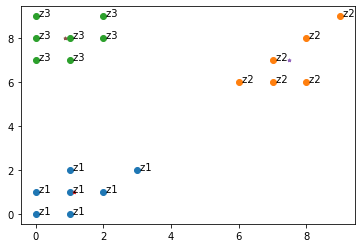

In [12]:
import matplotlib.pyplot as plt


image_clusters = [cluster.images for cluster in clusters_]

x_es = [[image[0] for image in images] for images in image_clusters]
y_es = [[image[1] for image in images] for images in image_clusters]

names = [' z' + str(i + 1) for i in range(len(image_clusters))]

standards = [cluster.standard for cluster in clusters_]

x_s = [standard[0] for standard in standards]
y_s = [standard[1] for standard in standards]

for i in range(len(x_es)):
    plt.scatter(x_es[i], y_es[i])

for i, txt in enumerate(names):
    for j in range(len(x_es[i])):
        plt.annotate(txt, (x_es[i][j], y_es[i][j]))

for i in range(len(x_s)):
    plt.scatter(x_s[i], y_s[i], s=10, marker='*')

plt.show()


# Observation of criterion change
As it was mentioned above on every iteration we try to minimize the quality criterion:
$$
I=\sum_{j=1}^{K}\sum_{\overline{x}\ \in\ S_{j}}|\overline{x}-\overline{m}_{j}|^{2},
$$
So, we try to reach it by minimizing the sum of squared distances from each cluster's images to its center:
$$
I(\overline{z}_{j})=\sum_{\overline{x}\ \in\ S_{j}}|\overline{x}-\overline{z}_{j}|^{2}
$$ 
Let's have a look on how these sums change on every iteration. So, we add some lines to k-mean function of printing these values.

In [14]:
def k_mean(images: List[np.ndarray], standards: List[np.ndarray]) -> List[Cluster]:
    clusters = get_clustered(images, standards)
    standards = [cluster.standard for cluster in clusters]

    while True:
        means = [cluster.get_mean() for cluster in clusters]

        for i, cluster in enumerate(clusters):
            print(f'Cluster {i + 1}: {cluster.get_deviation()}')
        print(f'Total sum {sum(map(lambda x: x.get_deviation(), clusters))}\n-----------')

        if is_equals(standards, means):
            break

        standards = means
        clusters = get_clustered(images, standards)

    return clusters

Let's check the result:


In [16]:
clusters_ = k_mean(images_, standards_)

Cluster 1: 0.0
Cluster 2: 572.0
Cluster 3: 359.0
Total sum 931.0
-----------
Cluster 1: 14.0
Cluster 2: 91.4
Cluster 3: 23.506172839506174
Total sum 128.90617283950618
-----------
Cluster 1: 11.72222222222222
Cluster 2: 19.040816326530614
Cluster 3: 8.857142857142856
Total sum 39.620181405895686
-----------
Cluster 1: 10.857142857142858
Cluster 2: 13.5
Cluster 3: 8.857142857142856
Total sum 33.214285714285715
-----------


# Parameters influence on results
Obviously, the result of clustering depends on the value and number of selected cluster centers, the sequence of image viewing and geometric characteristics of the data.

In [17]:
standards_ = images_[0:2]
clusters_ = k_mean(images_, standards_)

print(f'K-means result:')
for i, cluster in enumerate(clusters_):
    print(f'Cluster {i + 1}: {[image.tolist() for image in cluster.images]}')


Cluster 1: 195.0
Cluster 2: 836.0
Total sum 1031.0
-----------
Cluster 1: 158.0
Cluster 2: 146.50666666666666
Total sum 304.50666666666666
-----------
Cluster 1: 152.1322314049587
Cluster 2: 66.5679012345679
Total sum 218.7001326395266
-----------
Cluster 1: 151.33333333333331
Cluster 2: 62.75
Total sum 214.08333333333331
-----------
K-means result:
Cluster 1: [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [2.0, 1.0], [1.0, 2.0], [3.0, 2.0], [1.0, 7.0], [0.0, 7.0], [0.0, 8.0], [1.0, 8.0], [0.0, 9.0]]
Cluster 2: [[2.0, 8.0], [2.0, 9.0], [6.0, 6.0], [7.0, 6.0], [8.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0]]


In [18]:
standards_ = images_[4:6]
clusters_ = k_mean(images_, standards_)

print(f'K-means result:')
for i, cluster in enumerate(clusters_):
    print(f'Cluster {i + 1}: {[image.tolist() for image in cluster.images]}')

Cluster 1: 421.0
Cluster 2: 263.0
Total sum 684.0
-----------
Cluster 1: 246.47107438016528
Cluster 2: 54.97530864197532
Total sum 301.4463830221406
-----------
Cluster 1: 273.42361111111114
Cluster 2: 14.296874999999998
Total sum 287.72048611111114
-----------
Cluster 1: 271.2307692307692
Cluster 2: 8.857142857142856
Total sum 280.08791208791206
-----------
K-means result:
Cluster 1: [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [2.0, 1.0], [1.0, 2.0], [3.0, 2.0], [6.0, 6.0], [7.0, 6.0], [8.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0]]
Cluster 2: [[1.0, 7.0], [0.0, 7.0], [0.0, 8.0], [1.0, 8.0], [0.0, 9.0], [2.0, 8.0], [2.0, 9.0]]


In [19]:
standards_ = images_[5:8]
clusters_ = k_mean(images_, standards_)

print(f'K-means result:')
for i, cluster in enumerate(clusters_):
    print(f'Cluster {i + 1}: {[image.tolist() for image in cluster.images]}')

Cluster 1: 14.0
Cluster 2: 98.0
Cluster 3: 170.0
Total sum 282.0
-----------
Cluster 1: 11.72222222222222
Cluster 2: 51.0
Cluster 3: 41.00000000000001
Total sum 103.72222222222223
-----------
Cluster 1: 10.857142857142858
Cluster 2: 13.5
Cluster 3: 8.857142857142856
Total sum 33.214285714285715
-----------
K-means result:
Cluster 1: [[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [2.0, 1.0], [1.0, 2.0], [3.0, 2.0]]
Cluster 2: [[6.0, 6.0], [7.0, 6.0], [8.0, 6.0], [7.0, 7.0], [8.0, 8.0], [9.0, 9.0]]
Cluster 3: [[1.0, 7.0], [0.0, 7.0], [0.0, 8.0], [1.0, 8.0], [0.0, 9.0], [2.0, 8.0], [2.0, 9.0]]


So, how we can see the practical application of this algorithm requires a significant number of experiments involving the selection of different values of the parameter k and different centers of clusters.

Looking at the value of the quality criterion at the last iteration for different cases of choosing cluster centers, we can conclude that the smaller and relatively the same are these values, the more correct the result is.